<a href="https://colab.research.google.com/github/afrazja/analyze-box-office-with-seaborn/blob/main/Analyze_Box_Office_with_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center>Analyze Worldwide Box Office Data with Seaborn and Python (Part 1)</h2>
<img src="revenue.png">

### Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import json
import ast
from urllib.request import urlopen
from PIL import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Task 1: Data Loading and Exploration

In [ ]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")

In [ ]:
train.describe()

,id,budget,popularity,runtime,revenue,has_collection,num_genres,genre_Drama,genre_Comedy,genre_Thriller,...,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log-revenue,log-budget
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07,0.201333,2.503667,0.510333,0.342667,0.263000,...,2.189000,2.05200,1.808000,1.651333,1.502667,1.197000,0.434333,0.001333,15.961986,11.878667
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08,0.401063,1.117021,0.499977,0.474680,0.440336,...,1.597956,3.51142,2.560597,1.353653,1.726940,3.733475,1.235393,0.044709,3.061311,7.441843
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.682517,0.000000
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,0.000000,2.000000,1.000000,0.000000,0.000000,...,2.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,16.637310,15.894952
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07,0.000000,3.000000,1.000000,1.000000,1.000000,...,3.000000,2.00000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,18.048445,17.182806
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,1.000000,7.000000,1.000000,1.000000,1.000000,...,20.000000,33.00000,23.000000,30.000000,14.000000,52.000000,12.000000,2.000000,21.141685,19.755682


### Task 2: Visualizing the Target Distribution

<ipython-input-4-39507f7d7bb9>:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-4-39507f7d7bb9>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-4-39507f7d7bb9>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.c

Text(0.5, 1.0, 'Distribution of log-transformed revenue')

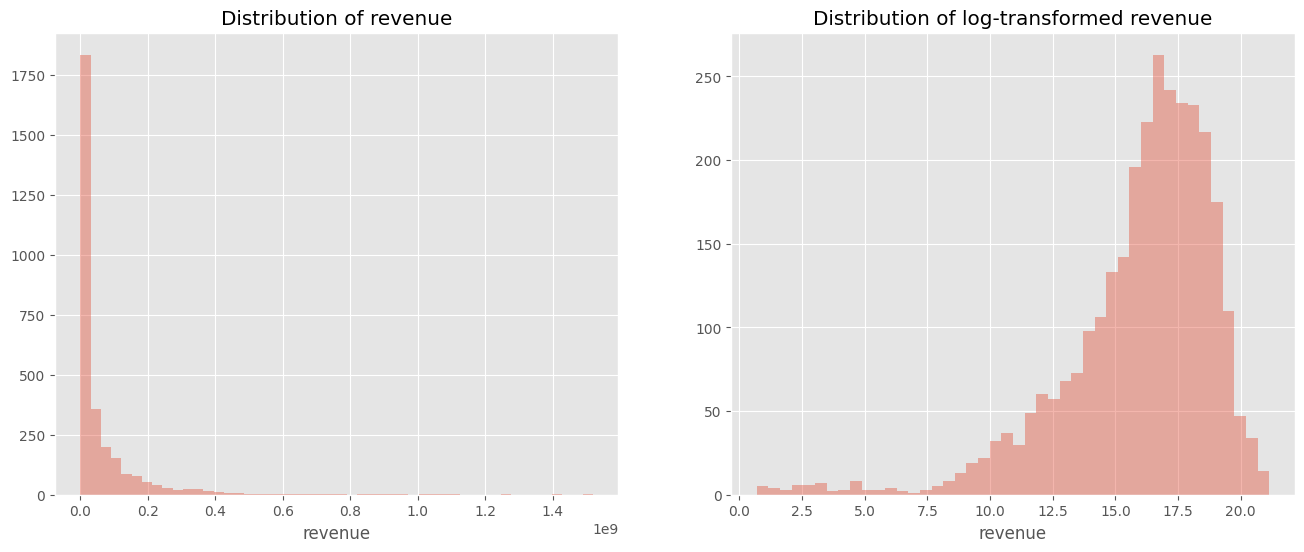

In [ ]:
fig,ax=plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(train['revenue'],kde=False);
plt.title('Distribution of revenue')
plt.subplot(1,2,2)
sns.distplot(np.log1p(train['revenue']),kde=False)
plt.title('Distribution of log-transformed revenue')

In [ ]:
train['log-revenue']=np.log1p(train['revenue'])
train['log-budget']=np.log1p(train['budget'])

### Task 3: Relationship between Film Revenue and Budget

Text(0.5, 1.0, 'log-revenue vs log-budget')

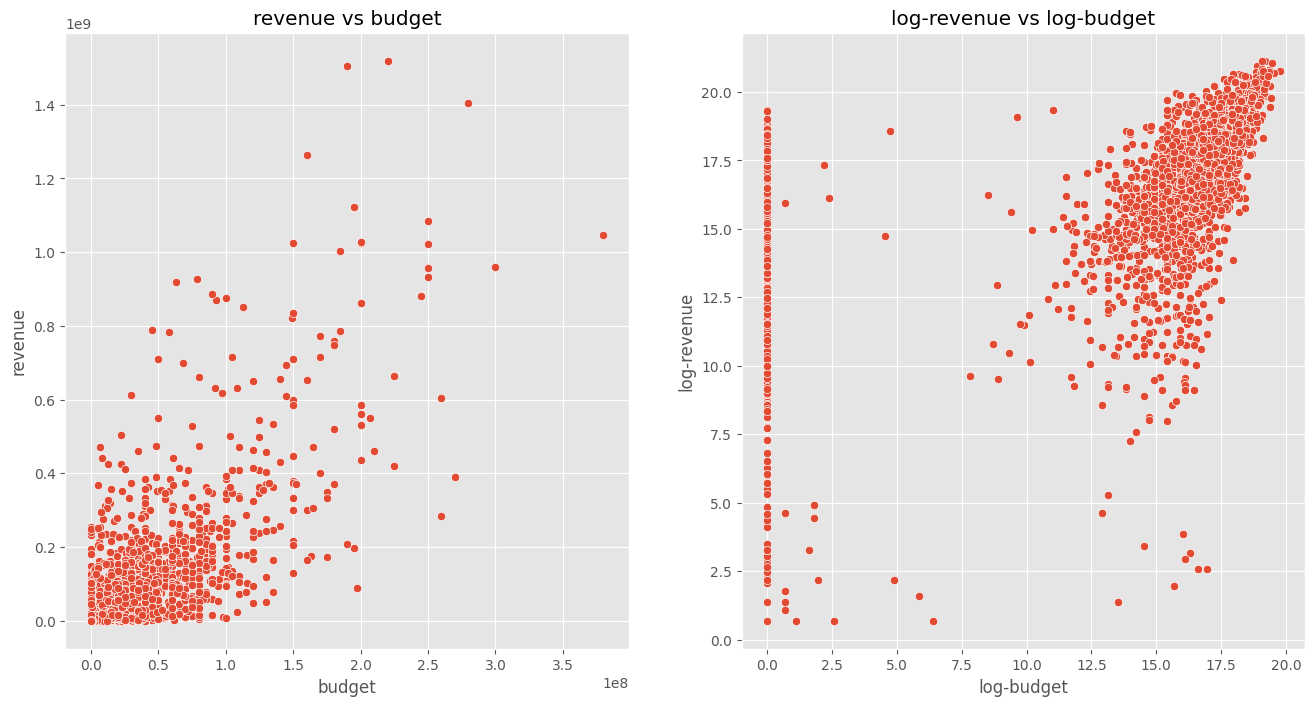

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(data=train,x='budget',y='revenue')
plt.title('revenue vs budget')
plt.subplot(1,2,2)
sns.scatterplot(data=train,x='log-budget',y='log-revenue')
plt.title('log-revenue vs log-budget')


In [ ]:
test['log-budget']=np.log1p(test['budget'])


### Task 4: Does having an Official Homepage Affect Revenue?

In [ ]:
train['has-homepage']=0
train.loc[train['homepage'].isnull()==False,'has-homepage']=1
test['has-homepage']=0
test.loc[test['homepage'].isnull()==False,'has-homepage']=1

In [ ]:
train.head(1)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log-revenue,log-budget,has-homepage
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,13,8,4,2,4,4,0,16.3263,16.454568,0


Text(0.5, 1.0, 'Revenue for films by homepage')

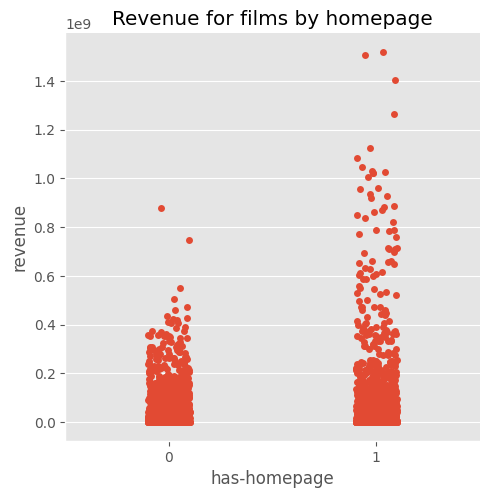

In [ ]:
sns.catplot(data=train,x='has-homepage',y='revenue')
plt.title('Revenue for films by homepage')

### Task 5: Distribution of Languages in Film

In [ ]:
language_data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]

Text(0.5, 1.0, 'mean log revenue per language')

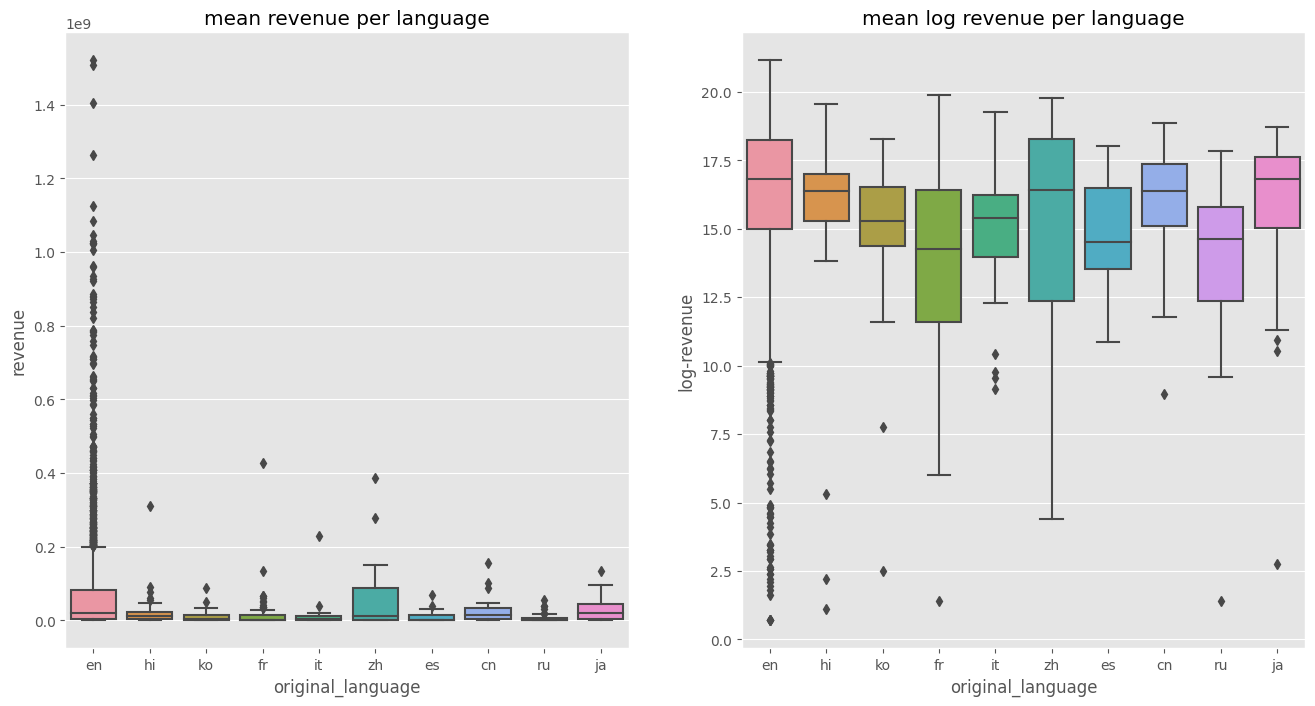

In [ ]:
plt.figure(figsize=(16 ,8))
plt.subplot(1,2,1)
sns.boxplot(x='original_language',y='revenue',data=language_data)
plt.title('mean revenue per language')
plt.subplot(1,2,2)
sns.boxplot(x='original_language',y='log-revenue',data=language_data)
plt.title('mean log revenue per language')


### Task 6: Frequent Words in Film Titles and Descriptions

In [ ]:
plt.figure(figsize(12,12))
test=''.join(train['original_title'].values)
wordcloud=Wordcloud(max_font_size=None,
                    background_color='white',
                    width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('top wprds acrpss movie titles')
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize(12,12))
test=''.join(train['overview'].fillna('').values)
wordcloud=Wordcloud(max_font_size=None,
                    background_color='white',
                    width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('top wprds acrpss movie overview')
plt.axis('off')
plt.show()

### Task 7: Do Film Descriptions Impact Revenue?

In [ ]:
import eli5
from sklearn.linear_model import LinearRegression

In [ ]:
vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),  
    min_df=5
)
overview_text=vectorizer.fit_tranform(train['overview'].fillna(''))
linreg=LinearRegression()
linreg.fit(overview_text,train['log_revenue'])
eli5.show_weights(linreg,vec=vectorizer, top=20, feature_filter=lambda x:x!='<BIAS>')